In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, roc_curve, auc, accuracy_score
from sklearn import metrics


In [2]:
#load the dataset
file =pd.read_csv(r'C:\Users\Sonal\RIGHTPOCKET.csv')

In [3]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 315000 entries, 0 to 314999
Data columns (total 12 columns):
sno              315000 non-null int64
Ax               315000 non-null float64
Ay               315000 non-null float64
Az               315000 non-null float64
Gx               315000 non-null float64
Gy               315000 non-null float64
Gz               315000 non-null float64
Mx               315000 non-null float64
My               315000 non-null float64
Mz               315000 non-null float64
Activitylabel    315000 non-null object
USERID           315000 non-null object
dtypes: float64(9), int64(1), object(2)
memory usage: 28.8+ MB


# Data Preprocessing & feature extraction

In [4]:
#missing value

file.isnull().sum()

sno              0
Ax               0
Ay               0
Az               0
Gx               0
Gy               0
Gz               0
Mx               0
My               0
Mz               0
Activitylabel    0
USERID           0
dtype: int64

In [5]:
df = file
df['A'] = ( df['Ax']**2 + df['Ay']**2 + df['Az']**2 ) **0.5
df['G'] = ( df['Gx']**2 + df['Gy']**2 + df['Gz']**2 ) **0.5
df['M'] = ( df['Mx']**2 + df['My']**2 + df['Mz']**2 ) **0.5

df.head()

,sno,Ax,Ay,Az,Gx,Gy,Gz,Mx,My,Mz,Activitylabel,USERID,A,G,M
0,0,-0.28603,-7.3141,-0.70826,1.4258,0.226630,0.43524,-1.14,27.18,23.16,walking,U1,7.353877,1.507880,35.727267
1,1,1.18500,-9.4117,0.61292,1.3952,-0.136830,0.50824,1.98,27.84,21.60,walking,U1,9.505787,1.491179,35.292294
2,2,1.41650,-9.3980,0.69464,1.4612,0.051924,0.46273,2.34,28.20,20.64,walking,U1,9.529502,1.533597,35.024637
3,3,1.74340,-9.4661,0.99429,1.6680,-0.132250,0.46395,3.12,29.10,18.72,walking,U1,9.676523,1.736365,34.741658
4,4,1.53910,-9.2755,0.92618,1.6142,-0.704630,0.44074,3.36,29.58,17.76,walking,U1,9.447832,1.815598,34.665308


In [6]:
scaled_X = df

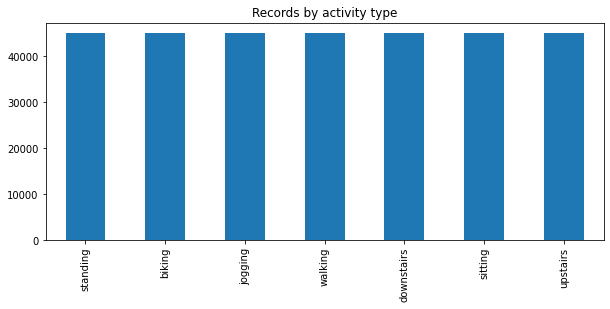

In [7]:
scaled_X['Activitylabel'].value_counts().plot(kind='bar', title='Records by activity type', figsize=(10, 4),align='center');

In [8]:
overlap = .5
data = scaled_X

wsize = 50 * 5


newdataset = scaled_X[['Ax','Ay','Az','Gx','Gy','Gz','Mx','My','Mz','A','G','M']]

newdata = newdataset.rolling(wsize, int(wsize/2)).mean().add_suffix('_mean')
data = data.join(newdata)

data = data.iloc[int(wsize*overlap)::int(wsize*overlap)]

data = data.drop(['Ax','Ay','Az','Gx','Gy','Gz','Mx','My','Mz','A','G','M'],axis=1)
data

,sno,Activitylabel,USERID,Ax_mean,Ay_mean,Az_mean,Gx_mean,Gy_mean,Gz_mean,Mx_mean,My_mean,Mz_mean,A_mean,G_mean,M_mean
125,125,walking,U1,1.052007,-9.861889,-0.855489,0.129538,0.112593,-0.013904,0.607619,31.58619,17.504286,10.864620,1.865794,37.160180
250,250,walking,U1,0.962521,-10.035958,-0.846915,-0.025603,0.068167,-0.093816,-0.484800,30.09456,18.633360,11.031090,1.961363,36.625585
375,375,walking,U1,0.708805,-9.875179,-1.083686,-0.062144,0.018478,-0.119840,-2.784960,29.82936,21.131040,11.090144,2.077419,37.971871
500,500,walking,U1,0.662276,-9.751077,-1.018030,0.136444,0.047548,-0.013448,-3.404400,30.17976,21.301920,11.078240,2.091453,38.437098
625,625,walking,U1,0.769275,-10.167373,-0.776465,0.070577,0.074223,-0.030934,0.464400,30.31440,18.981120,11.311003,2.063135,37.212759
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
314375,314375,downstairs,U5,-1.849480,-9.463364,-2.489529,0.110078,0.143373,-0.009618,-24.162480,39.66168,10.554720,10.521038,1.542559,49.261055
314500,314500,downstairs,U5,-1.754303,-9.714215,-2.061087,0.116666,0.179764,-0.040894,-24.222240,39.14112,8.730000,10.753054,1.657683,48.549129
314625,314625,downstairs,U5,-2.429002,-9.428844,-1.649042,0.122394,0.573692,0.001381,-9.540240,37.68888,-4.002720,10.567130,1.725353,47.965284
314750,314750,downstairs,U5,-2.384652,-9.243281,-2.102547,0.032232,0.419995,-0.010889,2.918880,34.87560,-11.031840,10.437720,1.710792,41.214322


In [9]:
data1 = scaled_X

In [10]:
overlap = .5
data1 = scaled_X

wsize = 50 * 5

newdataset = scaled_X[['Ax','Ay','Az','Gx','Gy','Gz','Mx','My','Mz','A','G','M']]



newdata = newdataset.rolling(wsize, int(wsize/2)).var().add_suffix('_var')
data1 = data1.join(newdata)


data1 = data1.iloc[int(wsize*overlap)::int(wsize*overlap)]
data1 = data1.drop(['Ax','Ay','Az','Gx','Gy','Gz','Mx','My','Mz','A','G','M'],axis=1)
data1

,sno,Activitylabel,USERID,Ax_var,Ay_var,Az_var,Gx_var,Gy_var,Gz_var,Mx_var,My_var,Mz_var,A_var,G_var,M_var
125,125,walking,U1,9.134966,14.055374,12.835039,1.890880,1.296890,0.785856,13.778783,8.285961,57.671089,16.929284,0.494478,2.702146
250,250,walking,U1,9.503533,15.285930,13.276999,2.060297,1.424331,0.873327,14.043158,16.538965,60.500439,18.668082,0.509723,2.414092
375,375,walking,U1,11.205384,19.976222,17.238743,2.184191,1.692584,0.967887,14.500435,21.276794,67.328899,24.529419,0.530301,4.917972
500,500,walking,U1,11.292532,21.513505,18.800601,2.174934,1.718943,1.050933,16.774238,20.249248,69.134917,25.332647,0.574211,4.521034
625,625,walking,U1,10.810853,19.173151,15.436583,2.257361,1.530506,1.096322,27.313418,16.453122,65.641403,21.958116,0.622062,3.656936
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
314375,314375,downstairs,U5,4.775803,16.915698,8.381726,2.336360,0.687340,0.262565,65.077065,10.715983,89.089649,18.508320,0.930118,5.871502
314500,314500,downstairs,U5,4.258013,17.296812,11.454394,2.568514,0.883526,0.266732,38.454450,13.299861,117.162802,19.016713,1.007614,6.205392
314625,314625,downstairs,U5,7.398876,12.096532,9.925608,2.325357,1.079186,0.244318,409.909142,32.601593,344.654563,15.222472,1.005548,10.881345
314750,314750,downstairs,U5,7.966516,12.996963,9.897490,2.479083,1.172858,0.202744,219.118627,31.575934,149.972984,17.406674,1.094389,47.162051


In [11]:
datanew = pd.merge(data, data1, on="sno")
datanew = datanew.drop(['Activitylabel_y','USERID_y'],axis=1)
datanew.columns

Index(['sno', 'Activitylabel_x', 'USERID_x', 'Ax_mean', 'Ay_mean', 'Az_mean',
       'Gx_mean', 'Gy_mean', 'Gz_mean', 'Mx_mean', 'My_mean', 'Mz_mean',
       'A_mean', 'G_mean', 'M_mean', 'Ax_var', 'Ay_var', 'Az_var', 'Gx_var',
       'Gy_var', 'Gz_var', 'Mx_var', 'My_var', 'Mz_var', 'A_var', 'G_var',
       'M_var'],
      dtype='object')

In [12]:
data2 = scaled_X

In [13]:
overlap = .5
data1 = scaled_X

wsize = 50 * 5

newdataset = scaled_X[['Ax','Ay','Az','Gx','Gy','Gz','Mx','My','Mz','A','G','M']]




newdata = newdataset.rolling(wsize, int(wsize/2)).std().add_suffix('_std')
data2 = data2.join(newdata)

#newdata = newdataset.rolling(wsize, int(wsize/2)).max().add_suffix('_max')
#d = d.append(newdata)

#newdata = newdataset.rolling(wsize, int(wsize/2)).kurt().add_suffix('_kurt')
#d = d.append(newdata)


data2 = data2.iloc[int(wsize*overlap)::int(wsize*overlap)]
data2 = data2.drop(['Ax','Ay','Az','Gx','Gy','Gz','Mx','My','Mz','A','G','M'],axis=1)
data2

,sno,Activitylabel,USERID,Ax_std,Ay_std,Az_std,Gx_std,Gy_std,Gz_std,Mx_std,My_std,Mz_std,A_std,G_std,M_std
125,125,walking,U1,3.022411,3.749050,3.582602,1.375093,1.138811,0.886485,3.711978,2.878535,7.594148,4.114521,0.703191,1.643821
250,250,walking,U1,3.082780,3.909723,3.643762,1.435374,1.193453,0.934520,3.747420,4.066813,7.778203,4.320658,0.713949,1.553735
375,375,walking,U1,3.347444,4.469477,4.151957,1.477901,1.300993,0.983813,3.807944,4.612678,8.205419,4.952718,0.728217,2.217650
500,500,walking,U1,3.360436,4.638265,4.335966,1.474766,1.311085,1.025150,4.095636,4.499916,8.314741,5.033155,0.757767,2.126272
625,625,walking,U1,3.287986,4.378716,3.928942,1.502452,1.237136,1.047054,5.226224,4.056245,8.101938,4.685949,0.788709,1.912312
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
314375,314375,downstairs,U5,2.185361,4.112870,2.895121,1.528516,0.829060,0.512411,8.067036,3.273528,9.438731,4.302130,0.964426,2.423118
314500,314500,downstairs,U5,2.063495,4.158944,3.384434,1.602658,0.939960,0.516461,6.201165,3.646897,10.824177,4.360816,1.003800,2.491062
314625,314625,downstairs,U5,2.720088,3.478007,3.150493,1.524912,1.038839,0.494285,20.246213,5.709780,18.564874,3.901599,1.002770,3.298688
314750,314750,downstairs,U5,2.822502,3.605130,3.146028,1.574510,1.082986,0.450271,14.802656,5.619247,12.246346,4.172131,1.046130,6.867463


In [14]:
data3 = scaled_X

In [15]:
overlap = .5
data3 = scaled_X

wsize = 50 * 5

newdataset = scaled_X[['Ax','Ay','Az','Gx','Gy','Gz','Mx','My','Mz','A','G','M']]




newdata = newdataset.rolling(wsize, int(wsize/2)).median().add_suffix('_median')
data3 = data3.join(newdata)

#newdata = newdataset.rolling(wsize, int(wsize/2)).max().add_suffix('_max')
#d = d.append(newdata)

#newdata = newdataset.rolling(wsize, int(wsize/2)).kurt().add_suffix('_kurt')
#d = d.append(newdata)


data3 = data3.iloc[int(wsize*overlap)::int(wsize*overlap)]
data3 = data3.drop(['Ax','Ay','Az','Gx','Gy','Gz','Mx','My','Mz','A','G','M'],axis=1)
data3

,sno,Activitylabel,USERID,Ax_median,Ay_median,Az_median,Gx_median,Gy_median,Gz_median,Mx_median,My_median,Mz_median,A_median,G_median,M_median
125,125,walking,U1,0.88532,-9.17330,-0.034050,0.241445,0.331390,0.163560,-0.63,31.38,18.87,9.491238,1.789538,37.317636
250,250,walking,U1,0.72188,-9.28230,0.054481,0.042150,0.216705,0.108120,-1.11,30.66,20.40,9.736592,1.852421,36.693741
375,375,walking,U1,0.39499,-9.10520,-0.068101,-0.086744,0.177000,0.079412,-2.94,28.77,23.76,9.712451,2.015684,38.034256
500,500,walking,U1,0.52438,-8.90770,-0.088532,0.266185,0.213500,0.176390,-3.96,29.04,24.03,9.351307,2.075862,38.822086
625,625,walking,U1,0.85808,-9.20055,-0.115770,0.055894,0.227700,0.189980,0.90,30.78,20.70,9.990415,2.014238,36.852701
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
314375,314375,downstairs,U5,-1.67530,-9.03030,-2.342700,0.344680,0.178525,-0.071471,-25.05,39.66,9.63,10.159260,1.292841,48.265235
314500,314500,downstairs,U5,-1.72980,-9.47295,-1.831950,0.342085,0.122170,-0.090408,-24.06,39.24,10.92,10.543765,1.324572,48.120262
314625,314625,downstairs,U5,-2.18610,-9.23460,-1.219000,0.361175,0.410655,-0.013898,-15.54,38.49,-2.43,9.968168,1.428115,48.065055
314750,314750,downstairs,U5,-2.16565,-9.08480,-2.090700,0.325435,0.229075,-0.023824,2.64,37.14,-9.93,9.775647,1.336906,42.337184


In [16]:
datanew1 = pd.merge(data2, data3, on="sno")
datanew1 = datanew1.drop(['Activitylabel_y','USERID_y'],axis=1)
datanew1.columns


Index(['sno', 'Activitylabel_x', 'USERID_x', 'Ax_std', 'Ay_std', 'Az_std',
       'Gx_std', 'Gy_std', 'Gz_std', 'Mx_std', 'My_std', 'Mz_std', 'A_std',
       'G_std', 'M_std', 'Ax_median', 'Ay_median', 'Az_median', 'Gx_median',
       'Gy_median', 'Gz_median', 'Mx_median', 'My_median', 'Mz_median',
       'A_median', 'G_median', 'M_median'],
      dtype='object')

In [17]:
datanew2 = pd.merge(datanew, datanew1, on="sno")
datanew2 = datanew2.drop(['Activitylabel_x_y','USERID_x_y'],axis=1)
datanew2.columns

Index(['sno', 'Activitylabel_x_x', 'USERID_x_x', 'Ax_mean', 'Ay_mean',
       'Az_mean', 'Gx_mean', 'Gy_mean', 'Gz_mean', 'Mx_mean', 'My_mean',
       'Mz_mean', 'A_mean', 'G_mean', 'M_mean', 'Ax_var', 'Ay_var', 'Az_var',
       'Gx_var', 'Gy_var', 'Gz_var', 'Mx_var', 'My_var', 'Mz_var', 'A_var',
       'G_var', 'M_var', 'Ax_std', 'Ay_std', 'Az_std', 'Gx_std', 'Gy_std',
       'Gz_std', 'Mx_std', 'My_std', 'Mz_std', 'A_std', 'G_std', 'M_std',
       'Ax_median', 'Ay_median', 'Az_median', 'Gx_median', 'Gy_median',
       'Gz_median', 'Mx_median', 'My_median', 'Mz_median', 'A_median',
       'G_median', 'M_median'],
      dtype='object')

In [18]:
df = datanew2.loc[datanew2['Activitylabel_x_x'] == 'standing']
df

,sno,Activitylabel_x_x,USERID_x_x,Ax_mean,Ay_mean,Az_mean,Gx_mean,Gy_mean,Gz_mean,Mx_mean,...,Az_median,Gx_median,Gy_median,Gz_median,Mx_median,My_median,Mz_median,A_median,G_median,M_median
71,9000,standing,U1,0.721658,-9.792345,-0.889467,0.074217,0.024442,-0.040694,-3.84840,...,-0.027241,0.039401,0.179285,0.207850,-4.77,24.36,19.17,9.731413,1.942039,31.939039
72,9125,standing,U1,1.009924,-9.907072,-0.418802,0.052793,0.065433,0.012864,-4.88976,...,-0.095342,0.009163,0.021686,0.003054,-6.30,31.08,-21.27,9.955604,0.157220,38.646987
73,9250,standing,U1,1.415161,-9.853123,-0.165787,0.010068,0.010463,-0.000732,-7.29576,...,-0.190680,0.010690,0.014050,-0.000611,-7.44,31.14,-21.84,9.956830,0.031097,38.760255
74,9375,standing,U1,1.383777,-9.859170,-0.221086,0.011445,0.019485,-0.001374,-7.76088,...,-0.217930,0.011606,0.021227,-0.002138,-7.80,31.26,-21.57,9.958424,0.024749,38.764435
75,9500,standing,U1,1.378656,-9.859990,-0.245005,0.011461,0.022003,-0.002751,-8.04456,...,-0.245170,0.011606,0.022602,-0.002749,-8.04,31.20,-21.48,9.958424,0.025647,38.781565
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2154,269375,standing,U5,-1.147215,-9.715494,0.690170,0.029368,0.048449,0.003822,-10.33248,...,0.898940,0.020159,0.041539,0.007330,-11.31,44.52,-21.93,9.868068,0.217913,50.594411
2155,269500,standing,U5,-0.707441,-9.766326,1.186986,0.011443,0.018635,-0.008776,-11.05536,...,1.212200,0.010079,0.026420,-0.000611,-11.16,43.38,-24.30,9.870450,0.060684,50.899029
2156,269625,standing,U5,-0.911910,-9.751903,0.828389,-0.016514,0.015488,0.030273,-10.12440,...,1.089600,0.003665,0.018326,0.007483,-10.74,43.68,-23.94,9.870350,0.095508,50.918299
2157,269750,standing,U5,-1.481239,-9.693933,0.441953,0.008198,0.021295,0.023006,-7.56024,...,0.408610,0.038790,0.025962,-0.003665,-6.84,44.82,-22.11,9.854376,0.162684,50.650520


# split into train & test

In [19]:
X = df[['Ax_mean', 'Ay_mean', 'Az_mean', 'Gx_mean',
       'Gy_mean', 'Gz_mean', 'Mx_mean', 'My_mean', 'Mz_mean', 'A_mean',
       'G_mean', 'M_mean', 'Ax_var', 'Ay_var', 'Az_var', 'Gx_var', 'Gy_var',
       'Gz_var', 'Mx_var', 'My_var', 'Mz_var', 'A_var', 'G_var', 'M_var',
       'Ax_std', 'Ay_std', 'Az_std', 'Gx_std', 'Gy_std', 'Gz_std', 'Mx_std',
       'My_std', 'Mz_std', 'A_std', 'G_std', 'M_std', 'Ax_median', 'Ay_median',
       'Az_median', 'Gx_median', 'Gy_median', 'Gz_median', 'Mx_median',
       'My_median', 'Mz_median', 'A_median', 'G_median', 'M_median']]
y = df['USERID_x_x']

In [20]:
#split into train and test
X_train,X_test,Y_train,Y_test = train_test_split(X, y, test_size = 0.2, random_state = 1,stratify = y)
X_train.shape,X_test.shape

((288, 48), (72, 48))

# train w/o feature selection

In [21]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score 

In [24]:
#train the model with light gradient boosting

from lightgbm import LGBMClassifier
lgb = LGBMClassifier(learning_rate = 0.003, boosting_type = 'gbdt', 
                         objective = 'multiclass', metric = 'multi_logloss',
                         num_leaves = 10, min_data = 50, max_depth = 10)
lgb.fit(X_train, Y_train)

y_predict = lgb.predict(X_test)


# accuracy: (tp + tn) / (p + n)
accuracy1 = accuracy_score(Y_test, y_predict)
print('Accuracy: %f' % accuracy1)
# precision tp / (tp + fp)
precision = precision_score(Y_test, y_predict, average = 'weighted')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(Y_test, y_predict, average='weighted')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(Y_test, y_predict, average='weighted')
print('F1 score: %f' % f1)

[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_data=50. Current value: min_data_in_leaf=50
Accuracy: 1.000000
Precision: 1.000000
Recall: 1.000000
F1 score: 1.000000


In [25]:
#train with random forest

rnd_clf = RandomForestClassifier(n_estimators=100, n_jobs=-1)
rnd_clf = rnd_clf.fit(X_train, Y_train)

#evaluate accuracy
y_predict = rnd_clf.predict(X_test)


# accuracy: (tp + tn) / (p + n)
accuracy2 = accuracy_score(Y_test, y_predict)
print('Accuracy: %f' % accuracy2)
# precision tp / (tp + fp)
precision = precision_score(Y_test, y_predict, average = 'weighted')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(Y_test, y_predict, average='weighted')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(Y_test, y_predict, average='weighted')
print('F1 score: %f' % f1)


Accuracy: 1.000000
Precision: 1.000000
Recall: 1.000000
F1 score: 1.000000


In [26]:
#train with decision tree
import scikitplot as skplt
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

dr = DecisionTreeClassifier()
dr = dr.fit(X_train, Y_train)
y_predict = dr.predict(X_test)

# accuracy: (tp + tn) / (p + n)
accuracy3 = accuracy_score(Y_test, y_predict)
print('Accuracy: %f' % accuracy3)
# precision tp / (tp + fp)
precision = precision_score(Y_test, y_predict, average = 'weighted')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(Y_test, y_predict, average='weighted')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(Y_test, y_predict, average='weighted')
print('F1 score: %f' % f1)

# skplt.metrics.plot_confusion_matrix(Y_test, y_predict, normalize=False, figsize = None)

# plt.show()

Accuracy: 0.986111
Precision: 0.987037
Recall: 0.986111
F1 score: 0.986093


# feature selection by RFE

In [27]:
#feature selection through RFE by using gradientboosting classifier
from sklearn.feature_selection import RFE

sel = RFE(RandomForestClassifier(n_estimators=100, random_state = 0), n_features_to_select = 7)
sel.fit(X_train, Y_train)

RFE(estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                     criterion='gini', max_depth=None,
                                     max_features='auto', max_leaf_nodes=None,
                                     min_impurity_decrease=0.0,
                                     min_impurity_split=None,
                                     min_samples_leaf=1, min_samples_split=2,
                                     min_weight_fraction_leaf=0.0,
                                     n_estimators=100, n_jobs=None,
                                     oob_score=False, random_state=0, verbose=0,
                                     warm_start=False),
    n_features_to_select=7, step=1, verbose=0)

In [28]:
features = X_train.columns[sel.get_support()]
features

Index(['Ax_mean', 'Mx_mean', 'M_mean', 'Ax_median', 'Mx_median', 'My_median',
       'M_median'],
      dtype='object')

In [29]:
#train by random forest
def run_RandomForestClassifier(X_train,X_test,Y_train,Y_test):
    clf = RandomForestClassifier(n_estimators=100, random_state = 0, n_jobs=-1)
    clf.fit(X_train, Y_train)
    y_predict = clf.predict(X_test)
    return(accuracy_score(Y_test, y_predict))

X_train_rfe = sel.transform(X_train)
X_test_rfe = sel.transform(X_test)

In [30]:
%%time
ar = run_RandomForestClassifier(X_train_rfe, X_test_rfe, Y_train, Y_test)
# accuracy: (tp + tn) / (p + n)
print('Accuracy: %f' % ar)
# precision tp / (tp + fp)
precision = precision_score(Y_test, y_predict, average = 'weighted')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(Y_test, y_predict, average='weighted')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(Y_test, y_predict, average='weighted')
print('F1 score: %f' % f1)

Accuracy: 1.000000
Precision: 0.987037
Recall: 0.986111
F1 score: 0.986093
Wall time: 267 ms


In [31]:
# train by decisiontree
def run_DecisionTreeClassifier(X_train,X_test,Y_train,Y_test):
    clf = DecisionTreeClassifier()
    clf.fit(X_train, Y_train)
    y_predict = clf.predict(X_test)
    return(accuracy_score(Y_test, y_predict))
    
    
X_train_rfe = sel.transform(X_train)
X_test_rfe = sel.transform(X_test)



In [32]:
%%time
ad = run_DecisionTreeClassifier(X_train_rfe, X_test_rfe, Y_train, Y_test)
# accuracy: (tp + tn) / (p + n)
print('Accuracy: %f' % ad)
# precision tp / (tp + fp)
precision = precision_score(Y_test, y_predict, average = 'weighted')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(Y_test, y_predict, average='weighted')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(Y_test, y_predict, average='weighted')
print('F1 score: %f' % f1)

Accuracy: 1.000000
Precision: 0.987037
Recall: 0.986111
F1 score: 0.986093
Wall time: 9.78 ms


In [33]:
#lgbclassifier
import lightgbm as lgb
from lightgbm import LGBMClassifier 
def run_LGBMClassifier(X_train,X_test,Y_train,Y_test):
    clf = LGBMClassifier(learning_rate = 0.003, boosting_type = 'gbdt', 
                         objective = 'multiclass', metric = 'multi_logloss',
                         num_leaves = 10, min_data = 50, max_depth = 10)
    clf.fit(X_train, Y_train)
    y_predict = clf.predict(X_test)
    return (accuracy_score(Y_test, y_predict))
    
    
X_train_rfe = sel.transform(X_train)
X_test_rfe = sel.transform(X_test)

In [34]:
%%time
lgm = run_LGBMClassifier(X_train_rfe, X_test_rfe, Y_train, Y_test)
# accuracy: (tp + tn) / (p + n)
print('Accuracy: %f' % lgm)
# precision tp / (tp + fp)
precision = precision_score(Y_test, y_predict, average = 'weighted')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(Y_test, y_predict, average='weighted')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(Y_test, y_predict, average='weighted')
print('F1 score: %f' % f1)

[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_data=50. Current value: min_data_in_leaf=50
Accuracy: 1.000000
Precision: 0.987037
Recall: 0.986111
F1 score: 0.986093
Wall time: 54 ms


# comparison chart with feature selection and without feature selection on different classifier

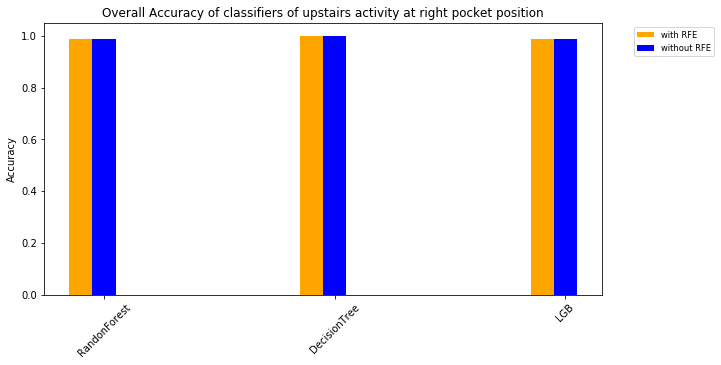

In [130]:
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import numpy as np


Out_Accuracy2 = [ar,ad,lgm]
Out_Accuracy3 = [accuracy2,accuracy3,accuracy1]
Model_2 = ['RandonForest','DecisionTree','LGB']

ind =  np.arange(3)   # the x locations for the groupsx
width = 0.1  # the width of the bars


fig, ax = plt.subplots(figsize=(10,5))
rects1 = ax.bar(ind, Out_Accuracy2, width, color='orange',label ='with RFE')
rects2 = ax.bar(ind + width ,Out_Accuracy3, width, color='b',label = 'without RFE')

ax.set_ylabel('Accuracy')
ax.set_title('Overall Accuracy of classifiers of upstairs activity at right pocket position')
ax.set_xticks(ind + width)
ax.set_xticklabels(Model_2,rotation=45)
plt.legend(handles=[rects1, rects2], bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')

plt.show()